
# PFM: Building Machine Learning Models

## **1. Importar librerías y datos**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Librerias pickle y csv
import pickle
import csv


from sklearn import preprocessing, model_selection, metrics

In [2]:
#Cargamos los datasets y las definiciones de las variables para tenerlas a mano

def load_obj(name ):
       with open('obj/' + name + '.pkl', 'rb') as f:
           return pickle.load(f)

df_REE=load_obj('df_Tenerife_Electricity_full_2019_clean+EDA');
dict_REE=load_obj('dict_descripcion_df_Electricity');
df_Meteo=load_obj('df_Tenerife_Meteo_28.14_-16.46_full_2019_clean+EDA');
dict_Meteo=load_obj('dict_descripcion_df_Meteo');

## **2. Combinar los datasets**

En este apartado se combinan los datasets de manera que tengamos un único conjunto de datos, facilitando así la manipulación de estos y la construcción de los modelos. Este paso es importante para evitar errores y confusiones más adelante.


In [3]:
#Eliminamos los atributos 'Month', 'Weekday' y 'Season' de uno de los datasets para evitar que queden duplicados al hacer la combinación de los dos conjuntos de datos.

df_REE=df_REE.drop(['Month','Weekday','Season'], axis=1)
df_REE.head()

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,Precio_generacion_€MWh,Aportacion_renovable_%
time_series,,,,,,,,,,,,
2019-01-01 00:00:00,347.6,0.0,347.6,0.0,173.2,159.0,0.0,0.0,15.4,343.4,156.18,0.000000
2019-01-01 00:10:00,345.0,0.0,345.0,0.0,176.2,152.8,0.0,0.0,16.0,343.4,156.18,0.000000
2019-01-01 00:20:00,346.9,0.1,347.0,0.0,174.9,155.9,0.1,0.0,16.1,343.4,156.18,0.028818
2019-01-01 00:30:00,344.5,0.2,344.7,0.0,173.8,155.4,0.2,0.0,15.3,343.4,156.18,0.058021
2019-01-01 00:40:00,342.9,0.1,343.0,0.0,175.8,151.6,0.1,0.0,15.5,343.4,156.18,0.029155


In [4]:
#Unimos los datasets  mediante .join()
#Esta función combina los datasets de acuerdo al índice del dataset principal (left)
df_ML=df_REE.join(df_Meteo)
df_ML.head()

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,...,Temp_Rocio_ºC,GHI_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º,Month,Weekday,Season
2019-01-01 00:00:00,347.6,0.0,347.6,0.0,173.2,159.0,0.0,0.0,15.4,343.4,...,7.5,0.0,8.2,54.6,119.0,3.5,163.0,1,2,Invierno
2019-01-01 00:10:00,345.0,0.0,345.0,0.0,176.2,152.8,0.0,0.0,16.0,343.4,...,7.4,0.0,8.2,54.4,118.0,3.5,165.0,1,2,Invierno
2019-01-01 00:20:00,346.9,0.1,347.0,0.0,174.9,155.9,0.1,0.0,16.1,343.4,...,7.7,0.0,8.1,54.8,117.0,3.5,167.0,1,2,Invierno
2019-01-01 00:30:00,344.5,0.2,344.7,0.0,173.8,155.4,0.2,0.0,15.3,343.4,...,8.0,0.0,8.1,55.4,115.0,3.6,169.0,1,2,Invierno
2019-01-01 00:40:00,342.9,0.1,343.0,0.0,175.8,151.6,0.1,0.0,15.5,343.4,...,8.2,0.0,8.0,55.9,114.0,3.6,171.0,1,2,Invierno


In [5]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52522 entries, 2019-01-01 00:00:00 to 2019-12-31 23:50:00
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Generacion_no_renovable_MW  52522 non-null  float64
 1   Generacion_renovable_MW     52522 non-null  float64
 2   Demanda_real_MW             52522 non-null  float64
 3   Generacion_FV_MW            52522 non-null  float64
 4   Generacion_TV_MW            52522 non-null  float64
 5   Generacion_CC_MW            52522 non-null  float64
 6   Generacion_EO_MW            52522 non-null  float64
 7   Generacion_TG_MW            52522 non-null  float64
 8   Generacion_MD_MW            52522 non-null  float64
 9   Demanda_programada_MW       52522 non-null  float64
 10  Precio_generacion_€MWh      52522 non-null  float64
 11  Aportacion_renovable_%      52522 non-null  float64
 12  Temp_Aire_ºC                52522 non-null  float64
 

In [6]:
df_ML.describe()

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,...,Nubosidad_%,Temp_Rocio_ºC,GHI_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º,Month,Weekday
count,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,...,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000
mean,330.727111,78.416148,409.143252,21.609013,123.647871,173.689606,56.807134,11.936868,21.452770,409.627204,...,6.591025,12.647803,243.694090,16.121736,69.674243,68.715414,5.917136,89.770192,6.524485,3.992536
std,82.004362,67.872114,79.170377,29.825503,45.359021,52.539022,53.238873,17.667290,13.804189,78.815017,...,14.328706,2.655771,322.729937,4.955958,12.977682,81.423938,2.538489,41.727244,3.448432,1.999139
min,91.000000,0.000000,179.600000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,262.900000,...,0.000000,-3.500000,0.000000,4.700000,21.100000,0.000000,0.000000,5.000000,1.000000,1.000000
25%,273.400000,16.500000,328.800000,0.000000,93.100000,143.700000,6.500000,0.000000,14.700000,330.500000,...,0.000000,11.500000,0.000000,12.900000,63.300000,30.000000,4.200000,54.000000,4.000000,2.000000
50%,324.600000,64.200000,431.200000,0.000000,122.800000,163.200000,41.000000,0.000000,18.800000,432.400000,...,0.000000,12.900000,5.000000,15.600000,72.300000,41.000000,6.100000,90.000000,7.000000,4.000000
75%,393.500000,127.400000,477.100000,43.600000,162.100000,202.300000,101.700000,20.700000,34.900000,478.200000,...,3.800000,14.300000,480.000000,18.400000,79.100000,57.000000,7.700000,125.000000,10.000000,6.000000
max,550.900000,265.600000,572.500000,99.800000,211.700000,396.000000,181.900000,206.500000,40.600000,570.900000,...,99.100000,18.900000,1090.000000,40.500000,95.600000,360.000000,14.300000,175.000000,12.000000,7.000000


Algunas preguntas que me vienen a la cabeza:

- ¿Eliminamos el atributo 'Aportacion_renovable_%'?
- ¿Puede ser interesante introducir una columna con la hora?
- ¿Separamos el dataset de info en real time del dataset de info day-ahead?
- ¿Hay que cambiar el formato de la columna 'Season'? ¿One Hot Encoding?
- Hay muchos atributos ¿Aplicamos featuring selection?
- Los atributos presentan diferentes unidades ¿Escalado de variables?
- Recordamos que las distribuciones de los atributos son peculiares ¿Normalización?
- ¿Analizar modelos con y sin entandarización?


## **3. Preparación de los datos**

Por el momento dejamos la columna 'Aportacion_renovable'. 
En este apartado nos centramos en introducir una nueva columna que ofrece información de la hora. También utilizaremos el método One Hot Encoding para transformar las variables categóricas del atributo 'Season' en vectores binarios, este método facilita el aprendizaje de los modelos de machine learning y suele dar un resultado positivo.

### **3.1 Variable Horaria**

### **3.2 One Hot Encoding**

### **3.3 Disgregación de los datos**

In [7]:
id_RT = [0,1,2,3,4,5,6,7,8,11,10] # Selecting the Electrical Real Time variables, excluding time vairables for the moment.
df_RT = pd.DataFrame(df_ML.iloc[:,id_RT], columns=df_ML.columns[id_RT])
df_RT.describe()

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Aportacion_renovable_%,Precio_generacion_€MWh
count,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000
mean,330.727111,78.416148,409.143252,21.609013,123.647871,173.689606,56.807134,11.936868,21.452770,18.568679,147.616681
std,82.004362,67.872114,79.170377,29.825503,45.359021,52.539022,53.238873,17.667290,13.804189,15.449206,18.787490
min,91.000000,0.000000,179.600000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.190000
25%,273.400000,16.500000,328.800000,0.000000,93.100000,143.700000,6.500000,0.000000,14.700000,4.321040,134.300000
50%,324.600000,64.200000,431.200000,0.000000,122.800000,163.200000,41.000000,0.000000,18.800000,15.521214,147.680000
75%,393.500000,127.400000,477.100000,43.600000,162.100000,202.300000,101.700000,20.700000,34.900000,30.880656,160.810000
max,550.900000,265.600000,572.500000,99.800000,211.700000,396.000000,181.900000,206.500000,40.600000,62.981244,370.480000


In [8]:
id_DA = [9,12,13,14,15,16,17,18,19,20,21,22,23,24,10] # Selecting the Weather Forecasting and Demand Scheduled Day-Ahead variables, excluding time variables for the moment.
df_DA = pd.DataFrame(df_ML.iloc[:,id_DA], columns=df_ML.columns[id_DA])
df_DA.describe()

,Demanda_programada_MW,Temp_Aire_ºC,Azimuth_º,Nubosidad_%,Temp_Rocio_ºC,GHI_Wm2,TPW_Kgm2,RH_%,WD_10m_º,WS_10m_ms,Zenith_º,Month,Weekday,Precio_generacion_€MWh
count,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000,52522.000000
mean,409.627204,18.625180,-0.034176,6.591025,12.647803,243.694090,16.121736,69.674243,68.715414,5.917136,89.770192,6.524485,3.992536,147.616681
std,78.815017,2.794493,98.204817,14.328706,2.655771,322.729937,4.955958,12.977682,81.423938,2.538489,41.727244,3.448432,1.999139,18.787490
min,262.900000,11.900000,-180.000000,0.000000,-3.500000,0.000000,4.700000,21.100000,0.000000,0.000000,5.000000,1.000000,1.000000,92.190000
25%,330.500000,16.900000,-90.000000,0.000000,11.500000,0.000000,12.900000,63.300000,30.000000,4.200000,54.000000,4.000000,2.000000,134.300000
50%,432.400000,18.100000,0.000000,0.000000,12.900000,5.000000,15.600000,72.300000,41.000000,6.100000,90.000000,7.000000,4.000000,147.680000
75%,478.200000,20.000000,90.000000,3.800000,14.300000,480.000000,18.400000,79.100000,57.000000,7.700000,125.000000,10.000000,6.000000,160.810000
max,570.900000,31.100000,180.000000,99.100000,18.900000,1090.000000,40.500000,95.600000,360.000000,14.300000,175.000000,12.000000,7.000000,370.480000


## **4. Featuring selection**

Feature Selection es uno de los núcleos conceptuales en machine learning que presenta un gran impacto en el comportamiento de tu modelo. Los atributos de los datos que usas para entrenar tu modelo de machine learning tienen una enorme influencia en el rendimiento que puedes conseguir (Raheel Shaikh, Oct 18).

Las características irrelevantes o parcialmente relevantes pueden afectar negativamente en el comportamiento del modelo. El feature selection y el data cleaning son pasos clave en el proceso de diseño del modelo de aprendizaje.


¿Como seleccionar los atributos y cuales son los beneficios de llevar a cabo el feature selection antes de modelar tus datos?
- Reduce el Overfitting: Menos datos redundantes, menores posibilidades de tomar decisiones en base al ruido.
- Mejora la precisión: Menos datos engañosos, mejora la precisión del modelo.
- Reduce el tiempo de entrenamiento: Menos datos, reduce la complejidad algorítmica y los algoritmos entrenan más rápido.

### **4.1 Real Time Features**

En este apartado se analizan aquellos datos recogidos en tiempo real y la correlación que presentan con el precio de generación (target). 

Se lleva a cabo esta discriminación ya que los datos recogidos a tiempo real mediante sensores y los datos obtenidos en day-ahead a traves de modelos predictivos, serán utilizados para aplicaciones distintas.

#### Filter method

Para los real time features se decide utilizar el método de filtraje. Este método consiste en filtrar y quedarse únicamente con el subset de aributos más relevantes. El modelo es construido tras la selección de atributos. El filtrado se lleva cabo mediante una matriz de correlación.

En primer lugar se grafica un mapa de calor para observar la correlación de las variables independientes con la variable de salida 'Precio_generacion_€MWh'. Solamente seleccionaremos aquellos atributos que presenten una correlación superior a 0.3 (cogiendo el valor absoluto) con la variable de salida.

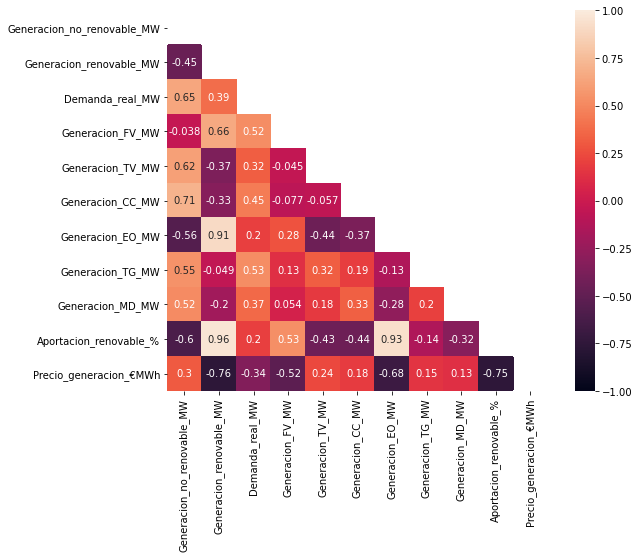

In [9]:
# Ploting the Electrical Real Time variables.
corrmat = df_RT.corr()
# Draw the heatmap using seaborn

# Quitar valores repetidos
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,7))
sns.heatmap(corrmat, vmin=-1, vmax=1, square=True, annot=True, mask=mask)

In [10]:
#Correlación con la variable de salida
cor_target = abs(corrmat["Precio_generacion_€MWh"])

#Seleccionamos los atributos con mayor correlación
relevant_features = cor_target[cor_target>0.3]
relevant_features

Generacion_no_renovable_MW    0.304913
Generacion_renovable_MW       0.762788
Demanda_real_MW               0.338105
Generacion_FV_MW              0.518843
Generacion_EO_MW              0.681781
Aportacion_renovable_%        0.751612
Precio_generacion_€MWh        1.000000
Name: Precio_generacion_€MWh, dtype: float64

Como se puede ver, solo los atributos mostrados en pantalla son variables relevantes, de modo que eliminaremos todos los otros atributos para no confundir al modelo. Sin embargo, este no es el final de proceso. Una de las premisas de las regresiones lineales es que las variables independientes no deben estar correlacionadas entre sí, si lo están tendremos que quedarnos solo con una de ella y descartar las demás. 

In [11]:
indexes=[]

for i in range(0,len(df_RT.columns)):
    for j in range (0,len(relevant_features.index)):
        if relevant_features.index[j]==df_RT.columns[i]:
            indexes.append(i)

df_RT_f = pd.DataFrame(df_RT.iloc[:,indexes], columns=df_RT.columns[indexes])

# Función para ver solo una mitad de la matriz
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_RT_f, 10))

Top Absolute Correlations
Generacion_renovable_MW     Aportacion_renovable_%    0.964014
Generacion_EO_MW            Aportacion_renovable_%    0.929803
Generacion_renovable_MW     Generacion_EO_MW          0.906539
                            Precio_generacion_€MWh    0.762788
Aportacion_renovable_%      Precio_generacion_€MWh    0.751612
Generacion_EO_MW            Precio_generacion_€MWh    0.681781
Generacion_renovable_MW     Generacion_FV_MW          0.657457
Generacion_no_renovable_MW  Demanda_real_MW           0.645843
                            Aportacion_renovable_%    0.604992
                            Generacion_EO_MW          0.558563
dtype: float64


Se decide eliminar 'Generacion_renovable_MW' y 'Aportacion_renovable_%' pues estos atributos están fuertemente relacionados entre sí y entre otros atributos como la generación eólica.

In [12]:
df_RT_f=df_RT_f.drop(['Generacion_renovable_MW','Aportacion_renovable_%'],axis=1)
df_RT_f

,Generacion_no_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_EO_MW,Precio_generacion_€MWh
2019-01-01 00:00:00,347.6,347.6,0.0,0.0,156.18
2019-01-01 00:10:00,345.0,345.0,0.0,0.0,156.18
2019-01-01 00:20:00,346.9,347.0,0.0,0.1,156.18
2019-01-01 00:30:00,344.5,344.7,0.0,0.2,156.18
2019-01-01 00:40:00,342.9,343.0,0.0,0.1,156.18
...,...,...,...,...,...
2019-12-31 23:10:00,371.4,373.7,0.0,2.3,140.89
2019-12-31 23:20:00,368.0,370.4,0.0,2.4,140.89
2019-12-31 23:30:00,362.6,365.3,0.0,2.7,140.89
2019-12-31 23:40:00,355.2,360.2,0.0,5.0,140.89


Finalmente nos quedamos con los siguientes atributos:

- Generacion_EO_MW
- Generacion_FV_MW
- Demanda_real_MW
- Generacion_no_renovable_MW

### **4.2 Day-Ahead Features**

#### ¿Which method?

## **5. Linear Regression**

La regresión lineal es probablemente una de las más importantes y ampliamente usadas técnicas de regresión. Está entre los métodos de regresión más simples. Una de sus principales ventajas es la facilidad de interpretar sus resultados. ( Mirko Stojiljković, Real Python, 07/02/21)


### **5.1 Real Time Features**
#### OLS Model

El primer modelo que se plantea es el modelo de regresión lineal simple (OLS). Se trata del modelo de machine learning más sencillo de todos, pero es la base para después desarrollar modelos más complejos y precisos. El OLS tiene como objetivo encontrar la relación que existe entre una variable independiente y una variable contínua dependiente (target).

En primer lugar se visualizan las variables independientes frente a la variable de salida. De este modo se puede intuir fácilmente que variable puede describir mejor el comportamiento de nuestro target.

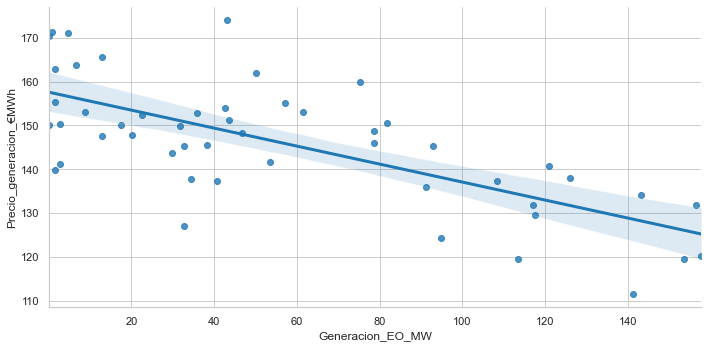

In [13]:
#seaborn set style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
%matplotlib inline 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

sns.lmplot("Generacion_EO_MW", "Precio_generacion_€MWh", df_RT.sample(50), aspect=2)

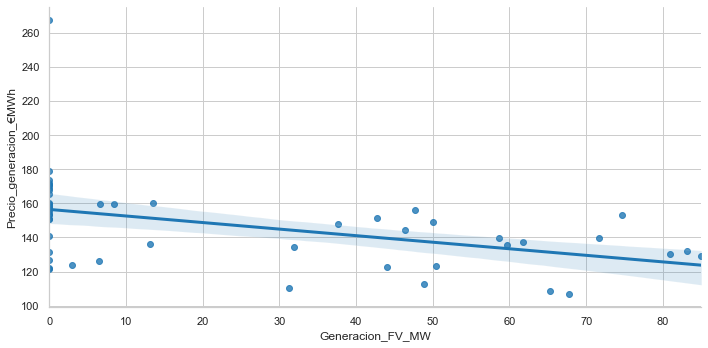

In [14]:
sns.lmplot("Generacion_FV_MW", "Precio_generacion_€MWh", df_RT.sample(50), aspect=2)

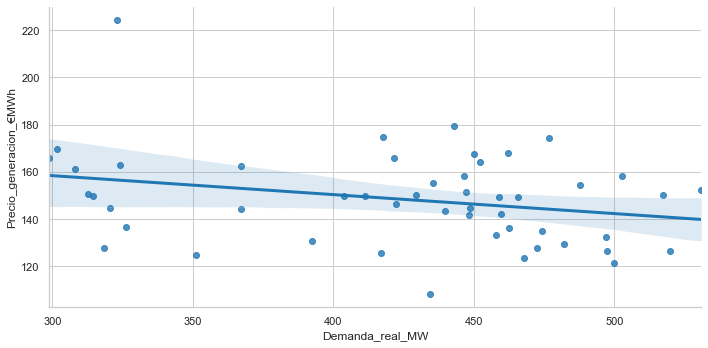

In [15]:
sns.lmplot("Demanda_real_MW", "Precio_generacion_€MWh", df_RT.sample(50), aspect=2)

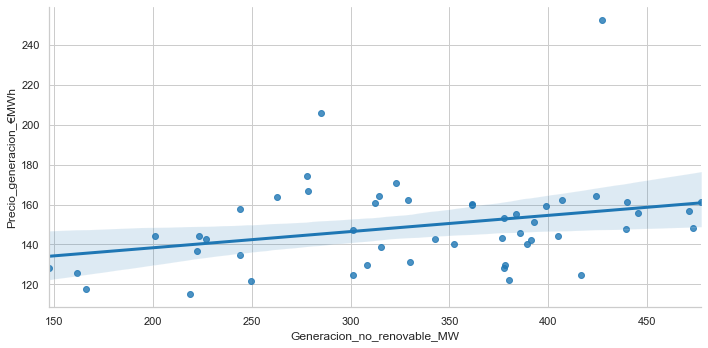

In [16]:
sns.lmplot("Generacion_no_renovable_MW", "Precio_generacion_€MWh", df_RT.sample(50), aspect=2)

In [17]:
from sklearn.model_selection import train_test_split

# 75% de datos para entrenar, 25% para testear
train, test = train_test_split(df_RT_f,test_size=0.25,random_state=40)

In [18]:
train.describe()

,Generacion_no_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_EO_MW,Precio_generacion_€MWh
count,39391.000000,39391.000000,39391.000000,39391.000000,39391.000000
mean,330.440258,409.294623,21.748719,57.105651,147.544094
std,82.041858,79.122707,29.930521,53.372587,18.854599
min,91.000000,179.600000,-3.000000,0.000000,92.190000
25%,273.200000,329.000000,0.000000,6.500000,134.120000
50%,324.400000,431.500000,0.000000,41.400000,147.580000
75%,393.500000,477.100000,43.800000,102.200000,160.780000
max,550.900000,570.700000,99.800000,181.900000,370.480000


In [19]:
# Podemos ver las features y la columna target
feature_vars = train.drop(['Precio_generacion_€MWh'],axis=1)
target_vars = train[['Precio_generacion_€MWh']]

#Split training dataset 
train_X = train[feature_vars.columns] #[['Generacion_EO_MW','Generacion_FV_MW','Demanda_real_MW','Generacion_no_renovable_MW']]
train_y = train[target_vars.columns] #['Precio_generacion_€MWh']

#Split test dataset
test_X = test[feature_vars.columns] #[['Generacion_EO_MW','Generacion_FV_MW','Demanda_real_MW','Generacion_no_renovable_MW']]
test_y = test[target_vars.columns] #['Precio_generacion_€MWh']

print('Train and test sizes {} {}'.format(train_X.shape, test_X.shape))

Train and test sizes (39391, 4) (13131, 4)


In [20]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Score using a single feature
regr_OLS = LinearRegression()
for i in np.arange(len(train_X.columns)):
    feat1=train_X.iloc[:,i:i+1]
    regr_OLS.fit(feat1, train_y)    
    print('Feature: {}'.format(train_X.columns[i]))
    print('Score: {}'.format(regr_OLS.score(feat1, train_y)))

Feature: Generacion_no_renovable_MW
Score: 0.09366848348539603
Feature: Demanda_real_MW
Score: 0.11371319602277274
Feature: Generacion_FV_MW
Score: 0.26885582303800093
Feature: Generacion_EO_MW
Score: 0.46183204861082383


Se puede observar que el mejor predictor es la variable 'Generacion_EO_MW', coincidiendo con el atributo que mayor índice de correlación presenta con la variable de salida según la matriz de pearson.

Analizando los gráficos, se observa que la relación entre la generación eólica y el precio de generación presenta una menor dispersión y mayor uniformidad a lo largo del eje x-y.

#### MLR Model

A continuación se van a utilizar modelos de regresión lineal múltiples para ver si mejora la predicción. Estos modelos consideran todas las variables independientes (predictores) seleccionadas y suelen tener un ínidice de acierto mayor.  

In [21]:
regr_MLR = LinearRegression()  # Creamos regresión lineal
regr_MLR.fit(train_X, train_y) # fitting
print('Coeff and intercept: {} {}'.format(regr_MLR.coef_[0], regr_MLR.intercept_[0]))

# Evaluamos
print('Training Score: {}'.format(regr_MLR.score(train_X, train_y)))
print('Testing Score: {}'.format(regr_MLR.score(test_X, test_y)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_MLR.predict(train_X) - train_y)**2)))
print('Testing MSE: {}'.format(np.mean((regr_MLR.predict(test_X) - test_y)**2)))


Coeff and intercept: [ 62.66574475 -62.6771507   62.4560233   62.46166891] 168.42722668223868
Training Score: 0.5813704789506565
Testing Score: 0.5924791290957263
Training MSE: Precio_generacion_€MWh    148.817308
dtype: float64
Testing MSE: Precio_generacion_€MWh    140.728667
dtype: float64


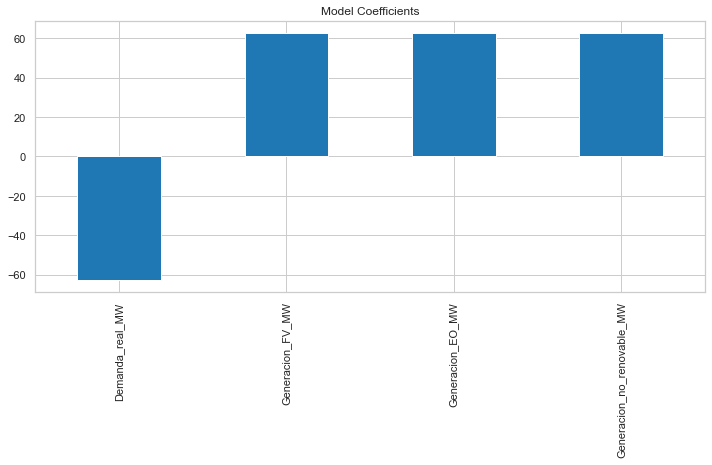

In [24]:
from pandas import Series
coef = Series(regr_MLR.coef_[0], train_X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [25]:
regr_ridge = linear_model.Ridge(alpha=.3) # Create a Ridge regressor
regr_ridge.fit(train_X, train_y)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(regr_ridge.coef_[0],  regr_ridge.intercept_[0]))

# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse
print('Training Score: {}'.format(regr_ridge.score(train_X, train_y)))
print('Testing Score: {}'.format(regr_ridge.score(test_X, test_y)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_ridge.predict(train_X) - train_y)**2)))
print('Test MSE: {}'.format(np.mean((regr_ridge.predict(test_X) - test_y)**2)))

Coeff and intercept: [ 1.12604955 -1.13746173  0.91633141  0.92196917] 168.43027449234006
Training Score: 0.5813650710124934
Testing Score: 0.5924583538323247
Training MSE: Precio_generacion_€MWh    148.81923
dtype: float64
Test MSE: Precio_generacion_€MWh    140.735842
dtype: float64


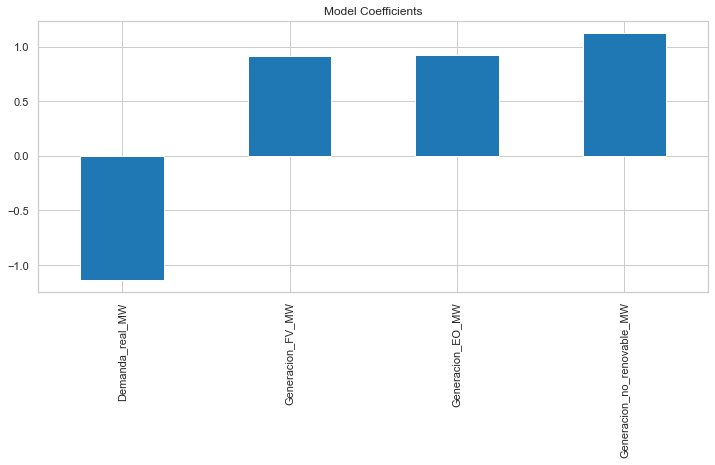

In [26]:
coef = Series(regr_ridge.coef_[0], train_X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [27]:
regr_lasso = linear_model.Lasso(alpha=.3) # Create a Lasso regressor
regr_lasso.fit(train_X, train_y)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(regr_lasso.coef_,  regr_lasso.intercept_[0]))

# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse
print('Training Score: {}'.format(regr_lasso.score(train_X, train_y)))
print('Testing Score: {}'.format(regr_lasso.score(test_X, test_y)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_lasso.predict(train_X) - train_y.iloc[:,0])**2)))
print('Test MSE: {}'.format(np.mean((regr_lasso.predict(test_X) - test_y.iloc[:,0])**2)))

# Are the coeficients now sparse?
# Is the score different?

Coeff and intercept: [ 0.09725119 -0.10869128 -0.11212357 -0.10676926] 168.43081461890225
Training Score: 0.5813645725947906
Testing Score: 0.5924564216659371
Training MSE: 148.8194073444574
Test MSE: 140.73650878319657


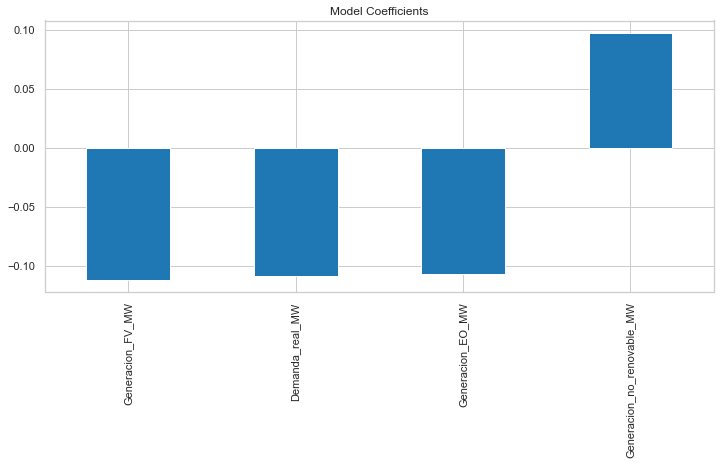

In [28]:
coef = Series(regr_lasso.coef_, train_X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

La evaluación de nuestro modelo de regresión lineal múltiple MLR no se ve alterada tras la regularización Ridge y/o Lasso. Esto nos indica que el modelo no presenta problemas de overfitting y que el proceso de feature selection ha sido exitoso, eliminando las variables irrelevantes y aquellas correlacionadas entre sí ( Jose Martinez Heras, iartifical.net).

Sería interesante hacer la comparación si utilizamos el dataset real time completo. Se ha comprobado y en realidad sale mejor modelo si no hacemos el featuring selection.... con estos resultados:

- Training Score: 0.6409808199907399
- Testing Score: 0.6544826513524737
- Training MSE: Precio_generacion_€MWh 127.626613 dtype: float64
- Testing MSE: Precio_generacion_€MWh 119.317069 dtype: float64

Tampoco se observa mejora en el modelo tras la regularización Ridge y/o Lasso.

#### Polynomial Regression Model

Por último, se puede considerar una dependencia polinómica entre los inputs (predictores) y el output y, calcular la función de regresión polinómica estimada que minimiza el error entre las predicciones y los valores reales para el subset de datos de entreno.

Hay que vigilar en los modelos de regresión polinómicos ya que hay que escoger el grado óptimo de regresión polinómica para evitar problemas de underfitting u overfitting.


In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [98]:
#regr_Poly = PolynomialFeatures(degree=2, include_bias=False) #Create a polynomial regressor
#regr_Poly.fit(train_X) #Perform de fitting

train_X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(train_X) #Modifying the input variables
test_X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(test_X) #Modifying the input variables
regr_poly = LinearRegression().fit(train_X_poly, train_y) #fitting
print('Coeff and intercept: {} {}'.format(regr_poly.coef_,  regr_poly.intercept_[0]))

# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse
print('Training Score: {}'.format(regr_poly.score(train_X_poly, train_y)))
print('Testing Score: {}'.format(regr_poly.score(test_X_poly, test_y)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_poly.predict(train_X_poly) - train_y.iloc[:,0])**2)))
print('Test MSE: {}'.format(np.mean((regr_poly.predict(test_X_poly) - test_y.iloc[:,0])**2)))



Coeff and intercept: [[    814.87209135    -814.98148228     814.41512738     814.44352134
   274808.2301747  -549715.79960076   61495.3160658   549642.96357062
   274907.56951525  -61594.65485823 -549742.30228412 -213312.9143178
    61521.81976766  274834.73331364]] 193.53284860873063
Training Score: 0.605010131581874


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 14)

#### Escalar variables

In [69]:
regr_RT.fit(train_X, train_y) # fitting
print('Coeff and intercept: {} {}'.format(regr_RT.coef_[0], regr_RT.intercept_[0]))

# Evaluamos
print('Training Score: {}'.format(regr_RT.score(train_X, train_y)))
print('Testing Score: {}'.format(regr_RT.score(test_X, test_y)))
# Compute MSE for training and testing sets 
print('Training MSE: {}'.format(np.mean((regr_RT.predict(train_X) - train_y)**2)))
print('Testing MSE: {}'.format(np.mean((regr_RT.predict(test_X) - test_y)**2)))


Coeff and intercept: [ 272.67692132 -263.02260279   99.14511072  176.81313827] 2.6931861256236395e-13
Training Score: 0.5813704789506569
Testing Score: 0.5924791290957203
Training MSE: 0.4186295210493431
Testing MSE: 0.395875825712514


In [68]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(train_X) #

#train_y2 = np.expand_dims(train_y, axis=1) # Expand the shape of the array from (253,) to (253, 1).
scalery = StandardScaler().fit(train_y) # Create the transformer StandardScaler and perform the fitting for the target

print("\nBefore transformation:")
print('Training: Max {}, min {}, mean {}, and var {}'.format(np.max(train_y.iloc[:,0]), np.min(train_y.iloc[:,0]), np.mean(train_y.iloc[:,0]), np.var(train_y.iloc[:,0])))
print('Testing: Max {}, min {}, mean {}, and var {}'.format(np.max(test_y.iloc[:,0]), np.min(test_y.iloc[:,0]), np.mean(test_y.iloc[:,0]), np.var(test_y.iloc[:,0])))


# Normalization of train and test data using mean and variance of the training:
train_X = scalerX.transform(train_X)
train_y = scalery.transform(train_y)
test_X = scalerX.transform(test_X)
#test_y2 = np.expand_dims(test_y, axis=1)
test_y = scalery.transform(test_y)

print("\nAfter transformation:")
print('Training: Max {}, min {}, mean {}, and var {}'.format(np.max(train_y), np.min(train_y), np.mean(train_y), np.var(train_y)))
print('Testing: Max {}, min {}, mean {}, and var {}'.format(np.max(test_y), np.min(test_y), np.mean(test_y), np.var(test_y)))


Before transformation:
Training: Max 370.48, min 92.19, mean 147.5440943362685, and var 355.48689289597314
Testing: Max 292.71, min 92.19, mean 147.83442997486875, and var 345.32873602987905

After transformation:
Training: Max 11.824103553354766, min -2.9358776532007727, mean 6.448656496007611e-16, and var 1.0
Testing: Max 7.699328180780024, min -2.9358776532007727, mean 0.015398859352882304, and var 0.9714246655246744


### **5.2 Day-Ahead Features**

#### ¿Which method?

# Leer Datos

In [29]:
data = pd.read_csv("Data/KAG_energydata_complete.csv")

FileNotFoundError: [Errno 2] File Data/KAG_energydata_complete.csv does not exist: 'Data/KAG_energydata_complete.csv'

In [ ]:
data.head()

In [ ]:
data.info()

# Resumen Datos

In [38]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [39]:
print('El Dataset tiene' , data.shape[0], 'filas')
print('El Dataset tiene'  , data.shape[1], 'columnas')

El Dataset tiene 19735 filas
El Dataset tiene 29 columnas


In [40]:
# Valores null
data.isnull().sum().sort_values(ascending = True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

### Limpieza de datos!

In [41]:
from sklearn.model_selection import train_test_split

# 75% de datos para entrenar, 25% para testear
train, test = train_test_split(data,test_size=0.25,random_state=40)

In [42]:
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,97.835281,3.809202,21.685153,40.271333,20.343487,40.432370,22.268005,39.252994,20.857724,39.041339,...,19.484679,41.567732,7.422035,755.561311,79.744066,4.057009,38.345054,3.768053,25.014452,25.014452
std,102.928289,7.940816,1.605537,3.983201,2.199037,4.081775,1.999986,3.263513,2.040012,4.355528,...,2.010610,4.167305,5.304241,7.398129,14.952250,2.449080,11.785900,4.189370,14.539819,14.539819
min,10.000000,0.000000,16.790000,27.233333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.366667,24.500000,0.000000,1.000000,-6.600000,0.006033,0.006033
25%,50.000000,0.000000,20.745000,37.363333,18.790000,37.900000,20.790000,36.900000,19.533333,35.530000,...,18.000000,38.500000,3.700000,750.983333,70.000000,2.000000,29.000000,0.933333,12.469764,12.469764
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.560000,20.666667,38.400000,...,19.390000,40.900000,6.933333,756.100000,83.833333,3.666667,40.000000,3.450000,24.936900,24.936900
75%,100.000000,0.000000,22.600000,43.090000,21.533333,43.290000,23.290000,41.790000,22.100000,42.193333,...,20.600000,44.363333,10.433333,760.966667,91.666667,5.500000,40.000000,6.566667,37.736202,37.736202
max,1080.000000,60.000000,26.260000,63.360000,29.856667,56.026667,29.200000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.033333,772.300000,100.000000,14.000000,66.000000,15.500000,49.993173,49.993173


###  De momento podemos ignorar la columna de la fecha y hora

In [43]:
# Nos quedan las siguentes features

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [44]:
# Podemos ver las features y la columna target
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

In [45]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,21.685153,20.343487,22.268005,20.857724,19.589105,7.923834,20.264300,22.028348,19.484679,40.271333,...,41.567732,7.422035,3.768053,79.744066,755.561311,4.057009,38.345054,3.809202,25.014452,25.014452
std,1.605537,2.199037,1.999986,2.040012,1.842916,6.083047,2.105079,1.951399,2.010610,3.983201,...,4.167305,5.304241,4.189370,14.952250,7.398129,2.449080,11.785900,7.940816,14.539819,14.539819
min,16.790000,16.100000,17.200000,15.100000,15.335000,-6.065000,15.390000,16.306667,14.890000,27.233333,...,29.166667,-5.000000,-6.600000,24.500000,729.366667,0.000000,1.000000,0.000000,0.006033,0.006033
25%,20.745000,18.790000,20.790000,19.533333,18.290000,3.663333,18.700000,20.790000,18.000000,37.363333,...,38.500000,3.700000,0.933333,70.000000,750.983333,2.000000,29.000000,0.000000,12.469764,12.469764
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.028571,22.111111,19.390000,39.656667,...,40.900000,6.933333,3.450000,83.833333,756.100000,3.666667,40.000000,0.000000,24.936900,24.936900
75%,22.600000,21.533333,23.290000,22.100000,20.633333,11.293333,21.600000,23.390000,20.600000,43.090000,...,44.363333,10.433333,6.566667,91.666667,760.966667,5.500000,40.000000,0.000000,37.736202,37.736202
max,26.260000,29.856667,29.200000,26.200000,25.745000,28.290000,25.963333,27.230000,24.500000,63.360000,...,53.326667,26.033333,15.500000,100.000000,772.300000,14.000000,66.000000,60.000000,49.993173,49.993173


In [46]:
# Vamos a mirar alguna distribución de los datos!
feature_vars.lights.value_counts()

0     11438
10     1649
20     1230
30      414
40       64
50        5
60        1
Name: lights, dtype: int64

In [47]:
target_vars.describe()

,Appliances
count,14801.000000
mean,97.835281
std,102.928289
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


###  Primeras preguntas

1. Mirar rangos temperaturas

2. Mirar rangos humedades

3. Distribución consumo aparatos electricos

4. Nos puede dar información útil la columna del consumo de luces?

In [48]:
# Podems borrar la column de las luces
_ = feature_vars.drop(['lights'], axis=1 , inplace= True) ;

C:\Users\Mini\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
feature_vars.head(2)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
9544,22.6,19.5,21.50,22.89,19.166667,2.863333,21.0,22.89,19.89,34.70,...,38.5,37.26,2.233333,0.4,87.666667,764.200000,1.333333,61.000000,43.195492,43.195492
19366,23.7,21.0,25.39,23.60,19.890000,5.500000,23.0,24.20,22.60,40.29,...,43.4,44.59,6.266667,5.3,93.666667,757.233333,1.000000,25.333333,46.369677,46.369677


# Visualización 

In [50]:
# plotly
#import plotly.plotly as py
from chart_studio.plotly import iplot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Time-series
visData = go.Scatter( x= data.date  ,  mode = "lines", y = data.Appliances )
layout = go.Layout(title = 'Appliance energy consumption measurement' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

fig.show()

In [51]:
# Añadir columan indicando días entre setmana (0) y fines de semana (1) 

data['WEEKDAY'] = ((pd.to_datetime(data['date']).dt.dayofweek)// 5 == 1).astype(float)
# 5472 lecturas en fin de semana
data['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

In [52]:
# Filas de lecturas entre semana
temp_weekday =  data[data['WEEKDAY'] == 0]
# Graficar
visData = go.Scatter( x= temp_weekday.date  ,  mode = "lines", y = temp_weekday.Appliances )
layout = go.Layout(title = 'Appliance energy consumption measurement on weekdays' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

fig.show()

In [53]:
# Filas de lecturas fin de semana
temp_weekend =  data[data['WEEKDAY'] == 1]
# Graficar
visData = go.Scatter( x= temp_weekend.date  ,  mode = "lines", y = temp_weekend.Appliances )
layout = go.Layout(title = 'Appliance energy consumption measurement on weekend' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

fig.show()

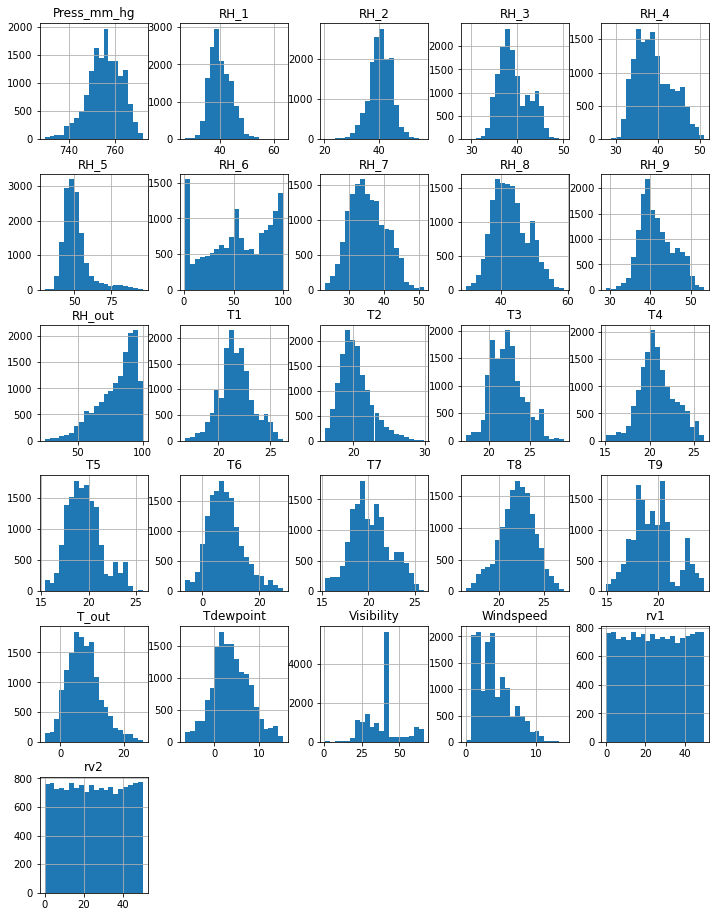

In [54]:
# Histograma de "features"
feature_vars.hist(bins = 20 , figsize= (12,16)) ;

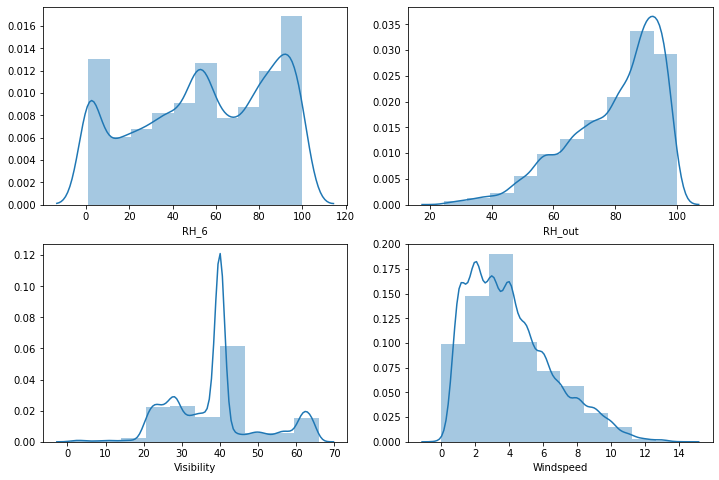

In [55]:
# RH_6 , RH_out , Visibility , Windspeed distribucines irregulares
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1])

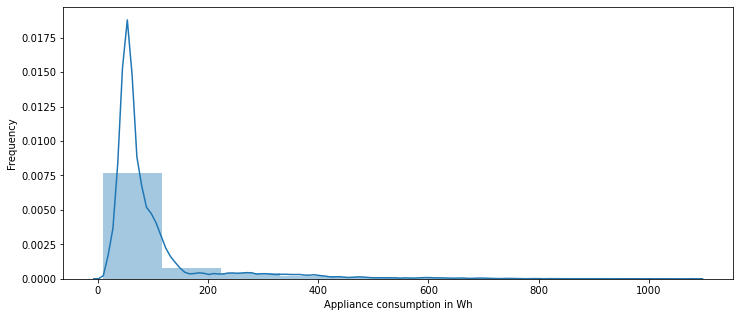

In [56]:
# Distribucion "Appliances"
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 ) ;

### Observaciones

1. Temperature - ¿Qué distribuciones vemos?
2. Humidity  - ¿Qué distribuciones vemos?
3. Appliance - ¿Es simétrica? Hay outliers
4. Visibilty - ¿Es simétrica? 
5. Windspeed - ¿Es simétrica? 


In [57]:
#Appliance con consumos bajos (menores a 200)
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100 )

Percentage of the appliance consumption is less than 200 Wh
Appliances    90.250659
dtype: float64


### Correlation Plots

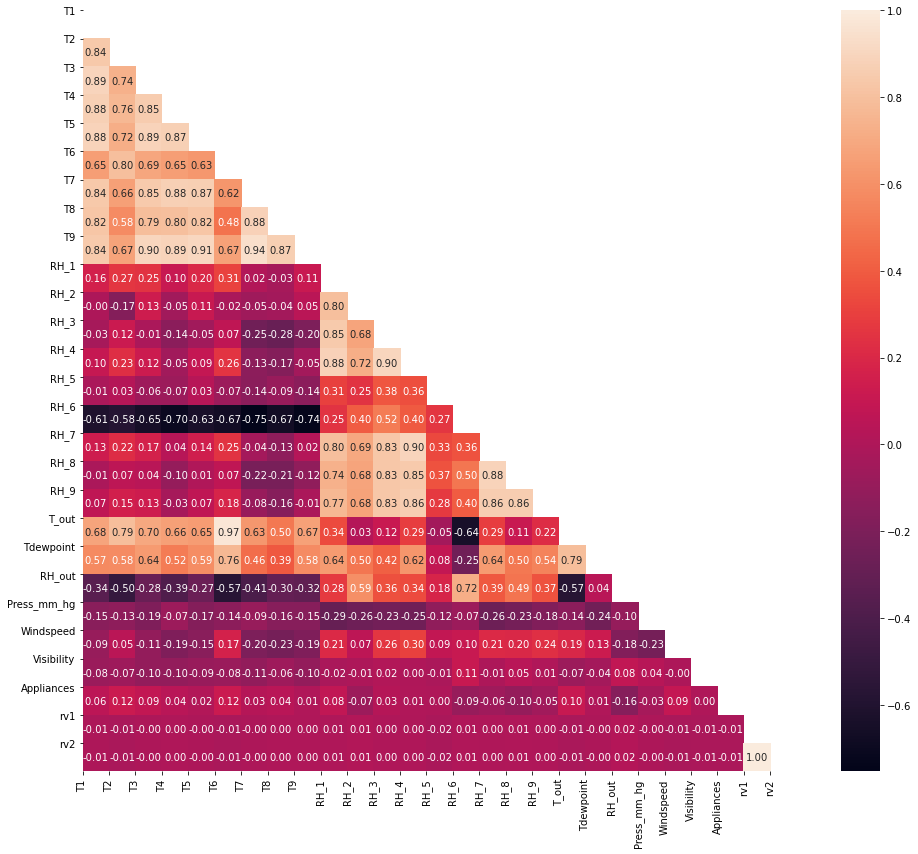

In [58]:
# Correlaciones
train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()
# Quitar valores repetidos
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generar Heat Map,
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    # yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    # plot
plt.show()

In [59]:
# Función para ver solo una mitad de la matriz
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974683
T7    T9       0.943921
T5    T9       0.910009
T3    T9       0.900209
RH_3  RH_4     0.899889
RH_4  RH_7     0.895120
T1    T3       0.892292
T4    T9       0.888264
T3    T5       0.887545
RH_7  RH_8     0.884849
T1    T5       0.884692
T7    T8       0.881513
RH_1  RH_4     0.880504
T1    T4       0.876682
T4    T7       0.876677
      T5       0.871733
T5    T7       0.869655
T8    T9       0.868251
RH_7  RH_9     0.860155
RH_4  RH_9     0.858454
RH_8  RH_9     0.857476
T3    T4       0.851790
RH_4  RH_8     0.848829
T3    T7       0.846021
RH_1  RH_3     0.845592
T1    T9       0.842862
      T7       0.837079
      T2       0.835729
RH_3  RH_9     0.834419
      RH_7     0.833924
      RH_8     0.831060
T1    T8       0.824657
T5    T8       0.824057
T2    T6       0.801219
RH_1  RH_7     0.800827
      RH_2     0.797598
T4    T8       0.796458
T3    T8       0.794213
T2    T_out    0.791553
dtype: float64

### Observaciones basadas en las correlaciones

1. Temperature

2. Weather attributes - (Visibility, Tdewpoint, Press_mm_hg)  

3. Humidity 

4. Variables aleatoras 


# Data Pre Processing

In [60]:
#Split training dataset 
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]

In [61]:
#Split testing dataset
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

In [62]:
# Quitar columnas que se han visto que no muestran información (train)
train_X.drop(["rv1","rv2","Visibility","T6","T9"],axis=1 , inplace=True)

C:\Users\Mini\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
# Due to conlusion made above below columns are removed
test_X.drop(["rv1","rv2","Visibility","T6","T9"], axis=1, inplace=True)

In [64]:
train_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [65]:
test_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Create test and training set by including Appliances column

train = train[list(train_X.columns.values) + col_target ]

test = test[list(test_X.columns.values) + col_target ]

# Create dummy test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = sc.fit_transform(test)


In [67]:
sc_train.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,...,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160,-0.270443
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,...,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270,-0.464759
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,...,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492,0.021032
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,...,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939,-0.561918
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,...,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602,-0.464759


In [68]:
sc_test.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
6314,-0.678526,-0.337714,-0.758967,-0.272083,-0.811540,-0.409392,-0.946375,-0.352449,-0.426736,0.306431,...,1.086122,-0.407472,-0.731388,-0.437093,-0.232839,-1.157146,-1.318014,0.377392,-0.809142,-0.367942
12257,0.814344,0.289201,1.432662,0.317741,1.062631,0.811654,1.049857,0.671740,1.084770,-0.220306,...,-1.056634,-0.276865,-0.989635,-0.554766,0.865496,0.485626,-0.967649,-0.401660,0.004891,3.087003
6271,-0.850621,-1.058130,-0.526796,-0.515812,-0.654758,-0.600348,-0.929458,-0.182731,0.160016,0.427270,...,0.869462,0.702690,0.538598,0.705174,-1.611203,-1.275901,1.191050,0.616061,-0.876978,-0.664080
18179,0.938750,0.485399,0.955147,1.146419,1.134714,1.502863,1.400044,-0.419664,-0.511502,-0.885589,...,-1.365905,-0.346975,-0.678579,-1.043214,0.591690,0.568755,-0.323430,0.701622,-1.216158,-0.565367
9661,0.005706,-0.368370,-0.396714,-0.137220,-0.595289,-0.270881,0.339334,-0.797748,-0.320955,-1.037265,...,0.039148,-1.025548,-1.028276,-1.198139,-0.307513,-0.001268,0.524227,0.917775,0.004891,0.224334


In [69]:
# sacar Appliances columna de training set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

In [70]:
train_X.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,...,2.267242,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,...,-1.454588,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,...,-0.101804,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,...,1.009651,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,...,0.137914,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602


In [71]:
train_y.head()

9544    -0.270443
19366   -0.464759
10816    0.021032
15457   -0.561918
2956    -0.464759
Name: Appliances, dtype: float64

# Implementacion del modelo

Probaremos los siguientes modelos:

**Linear regression models**

1.Ridge regression 

2.Lasso regression 

**Support Vector Machine**

3.Support vector regression 

**Nearest neighbour Regressor**

4.KNeighborsRegressor

**Ensmble models**

5.Random Forest Regressor

6.Gradient Boosting Regressor

7.ExtraTrees Regressor

**Neural Network**

8.Multi Layer Preceptron Regressor



In [72]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR


In [75]:
# Lista de modelos a probar
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]


In [76]:
# Correr los modelos
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [77]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.01201319694519043,
  'Train_R2_Score': 0.0,
  'Test_R2_Score': 0.0,
  'Test_RMSE_Score': 1.0},
 {'Name': 'Ridge: ',
  'Train_Time': 0.007008075714111328,
  'Train_R2_Score': 0.1375528613228285,
  'Test_R2_Score': 0.12139099895516814,
  'Test_RMSE_Score': 0.937341453817568},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.13311195373535156,
  'Train_R2_Score': 0.6814639376039895,
  'Test_R2_Score': 0.4855598647200512,
  'Test_RMSE_Score': 0.7172448224141802},
 {'Name': 'SVR:',
  'Train_Time': 9.130113363265991,
  'Train_R2_Score': 0.23572363185689515,
  'Test_R2_Score': 0.20993387920257733,
  'Test_RMSE_Score': 0.8888566368078841},
 {'Name': 'RandomForest ',
  'Train_Time': 25.3937246799469,
  'Train_R2_Score': 0.9393208146439452,
  'Test_R2_Score': 0.5573445355040687,
  'Test_RMSE_Score': 0.6653235787915015},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 8.732882738113403,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.6290452743728374,
  

In [78]:
# Pasar a datframe
df = pd.DataFrame(model_data)

In [79]:
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.012013,0.000000,0.000000,1.000000
1,Ridge:,0.007008,0.137553,0.121391,0.937341
2,KNeighborsRegressor:,0.133112,0.681464,0.485560,0.717245
3,SVR:,9.130113,0.235724,0.209934,0.888857
4,RandomForest,25.393725,0.939321,0.557345,0.665324
5,ExtraTreeRegressor :,8.732883,1.000000,0.629045,0.609061
6,GradientBoostingClassifier:,7.129635,0.333526,0.231988,0.876363
7,XGBRegressor:,1.505064,0.844009,0.458513,0.735858
8,MLPRegressor:,3.520491,0.298567,0.243178,0.869955


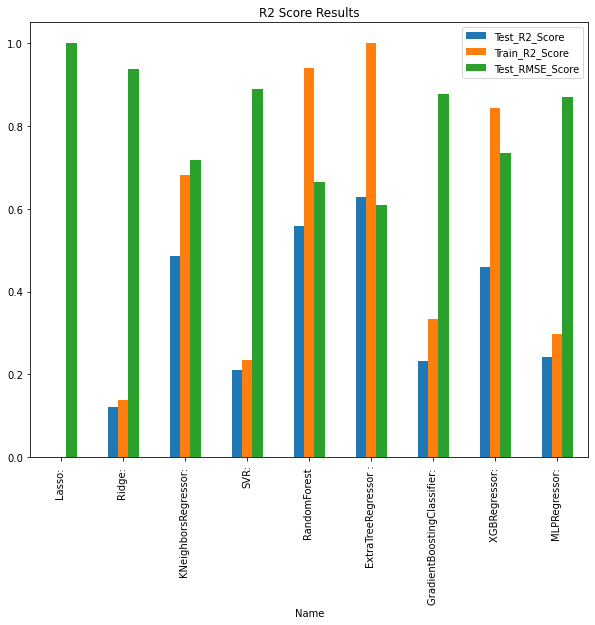

In [80]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

### Obervaciones
1. Mejor modelo Extra Tree Regressor con R2 score of 0.57
2. Menor RMSE score también Extra Tree Regressor 0.65
2. Lasso regularization la peor!


# Configurar parámetros 

In [81]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Inizializar
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 14.9min finished


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [82]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 250}

In [83]:
# Mejores parámetros para ExtraTreesRegressor
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=250,
                    random_state=40)

In [84]:
# R2 score en training
grid_search.best_estimator_.score(train_X,train_y)

1.0

In [85]:
# R2 score en test
grid_search.best_estimator_.score(test_X,test_y)

0.6377804349254067

In [86]:
# RMSE score en test
np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.6018467953512698

### Observaciones


1. Mejor combinación - 'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 200

    
2. Training set  R2 score de 1.0 (overfitting?)


3. Test set R2 score de 0.63 mejora el de 0.57 


4. Test set RMSE score de 0.60 mejora el de 0.65 




### Features 

In [87]:
# Mejores features
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

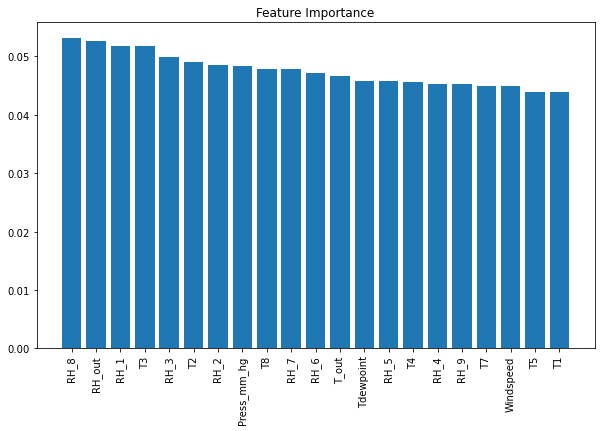

In [88]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [89]:
# top 5
names[0:5]

['RH_8', 'RH_out', 'RH_1', 'T3', 'RH_3']

In [90]:
# ultimas 5
names[-5:]

['RH_9', 'T7', 'Windspeed', 'T5', 'T1']

In [91]:
# Reducimos set a las 5 mejores
train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [92]:
# Volvemos a probar!

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=250,
                    random_state=40)

In [93]:
# Nuevos scores

print('Training set R2 Score - ', metrics.r2_score(train_y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))


Training set R2 Score -  0.9999837366892088
Testing set R2 Score -  0.47520832858877793
Testing set RMSE Score -  0.7244250626608815


### Observaciones

1. Features

    a. top 5 - 'RH_out', 'RH_8', 'RH_1', 'T3', 'RH_3'
    
    b. peores 5 - 'T7','Tdewpoint','Windspeed','T1','T5'
    

3. R2 baja mucho así que mejor no usar el dataset reducido